# Clase de redes complejas en Python

En este notebook tenéis una serie de ejemplos de cómo emplear `networkx`, la librería estándar de Python para trabajar con redes complejas. Estas notas contienen explicaciones teóricas y líneas de código intercaladas, pensadas para ser leídas y ejecutadas en orden. Os dejo aquí un [enlace a la API](https://networkx.org/documentation/stable/index.html "Título del enlace") de `networkx` para consultar cualquier duda y ver todos los usos y funciones de esta librería.  
Comenzamos importando la librería central de esta clase:

In [2]:
import networkx as nx

## ¿Qué es una red compleja?  
  
Una **red compleja** es una abstracción matemática en la que modelamos ciertos elementos (denominados **nodos**) y las conexiones que existen entre ellos (llamados **ejes o aristas**). Hay cientos de ejemplos en un nuestra vida cotidiana que responden a este patrón:
* Las centrales eléctricas y el cableado que las une forman la red eléctrica de España.
* Las personas dentro de una aplicación como Instagram y sus seguidores y seguidos forman una red social.
* Los aeropuertos que tienen vuelos entre ellos generan una red.
* *Y un largo ectétera...*  

Estos nodos y conexiones pueden representarse mediante un **grafo**, en el que los puntos son los nodos y las lineas que los conectan son los ejes. Un ejemplo de grafo sencillo puede ser el siguiente:

![Simple Graph](https://upload.wikimedia.org/wikipedia/commons/5/5b/6n-graf.svg "Simple Graph")
  
Vamos a crear este grafo empleando `networkx`

Nodos del grafo: [1, 2, 3, 4, 6, 5]
Aristas del grafo: [(1, 2), (1, 5), (2, 3), (2, 5), (3, 4), (4, 6), (4, 5)]
Número de nodos: 6
Número de aristas: 7
0.27777777777777773
{1: 1.0, 2: 0.3333333333333333, 3: 0, 4: 0, 6: 0, 5: 0.3333333333333333}


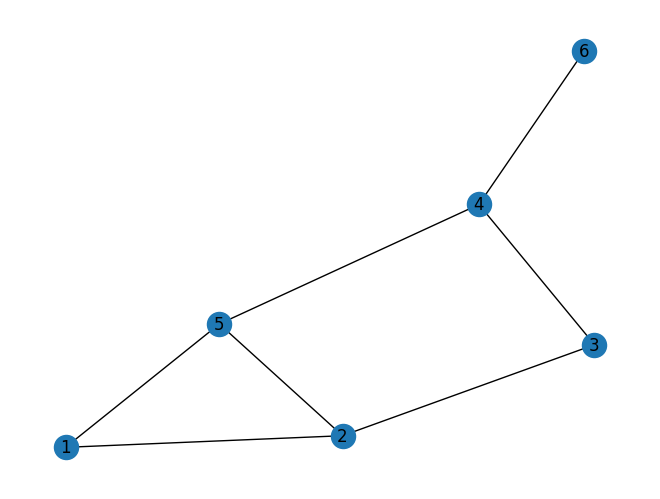

In [14]:
# Crear un grafo vacío
G = nx.Graph()

## Id descomentando línea a línea para ver como cambia el grafo##
G.add_node(1)
G.add_nodes_from([2, 3, 4])
G.add_edge(1, 2)
G.add_edge(4, 6)
G.add_edges_from([(1, 5), (2, 3), (2, 5), (3, 4), (4, 5)])



# Mostrar nodos y aristas
print("Nodos del grafo:", G.nodes())
print("Aristas del grafo:", G.edges())
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

#Dos formas de representar ¡Usad solo una a la vez!
nx.draw(G, with_labels=True)
#nx.draw(G, pos=nx.circular_layout(G), with_labels=True)

print(nx.average_clustering(G))

Como adelantamos antes, el grafo que acabamos de obtener con `networkx` es equivalente al del dibujo de arriba.  
Ahora bien, la pregunta es clara: ***¿Cómo podemos trabajar matemáticamente con los grafos y estudiar bien sus propiedades?***

## Matriz de adyacencia $A$

Los grafos se representan (*principalmente*) mediante su **matriz de adyacencia** $A$: Los elementos de esta matriz $a_{ij}$ nos dicen si el nodo $i$ está conectado con el $j$. Por seguir con el mismo ejemplo, la matriz de adyacencia del grafo de antes es la siguiente (debajo indicamos cómo sacar la matriz de adyacencia $A$ de un grafo con `networkx`):  

![Simple Graph](https://upload.wikimedia.org/wikipedia/commons/5/5b/6n-graf.svg "Simple Graph")
$$A=\begin{pmatrix} 0&1&0&0&1&0 \\ 1&0&1&0&1&0 \\ 0&1&0&1&0&0 \\ 0&0&1&0&1&1 \\ 1&1&0&1&0&0 \\ 0&0&0&1&0&0 \end{pmatrix}$$  




In [5]:
A = nx.adjacency_matrix(G).toarray()
print(A)

[[0 1 0 0 0 1]
 [1 0 1 0 0 1]
 [0 1 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 1 0 0]
 [1 1 0 1 0 0]]


*Nota técnica: Es muy probable que las filas y columnas de $A$ os salgan con un orden distinto al de la matriz representada arriba, pero cambiar el orden y las filas de una matriz de adyacencia no cambia sus propiedades (en este caso)*

Hay muchos tipos de grafos según sus propiedades: 
* Si $A$ no es simétrica, $a_{ij} \neq a_{ji}$, se le denomina un **grafo dirigido**
* Si $A$ tiene algún elemento $a_{ij}$ distinto de $0$ o $1$, se le denomina un **grafo ponderado**
* Si se puede llegar a cualquier nodo trazando un camino por los ejes del grafo desde cualquier nodo, se le denomina un **grafo conexo**
* *Otro largo etcétera...*  

Nosotros nos centraremos en esta clase en grafos no dirigidos y no ponderados.  
En este contexto, hay muchos tipos de redes; pero nosotros nos centraremos hoy en tres ejemplos muy comunes: Las redes de ***Erdös-Rényi*** (o aleatorias), las redes ***Watts-Strogatz*** (o Small-World) y las redes ***Barabási-Albert*** (o Scale-Free)




## Tipos de redes complejas

En la imagen que hay debajo os represento 3 ejemplos característicos de los tres tipos de redes que os he mencionado antes  
![Graphs](https://raw.githubusercontent.com/yanezrodfrancisco/Clase_redes/b2c4807f459fd74a83c5d8425245a9287defbe64/networks.svg
 "Graphs")
* El primer tipo de red, la **Watts-Strogatz**, es una red en la que la inmensa mayoría de los nodos se conecta con sus vecinos cercanos, pero con una probabilidad $p \in (0, 1)$ se genera una conexión distinta con un nodo aleatorio de la red. Además, se establece una conexión promedio $k$ entre todos los vecinos cercanos.
* El segundo tipo de red, la **Erdös-Renyi**, es sencillo de entender: Son redes en el que los nodos se conectan entre ellos aleatoriamente.
* El tercer tipo de red que veremos es la **Barabási-Albert**. Dicho "mal y pronto", lo característico de estas redes es que tienen muchos nodos con muy pocas conexiones y pocos nodos con muchas conexiones.
  
La forma en la que se trabaja en networkx con estas redes es, en general como en el ejemplo que pongo a continuación, en el que dibujamos el diagrama de arriba.





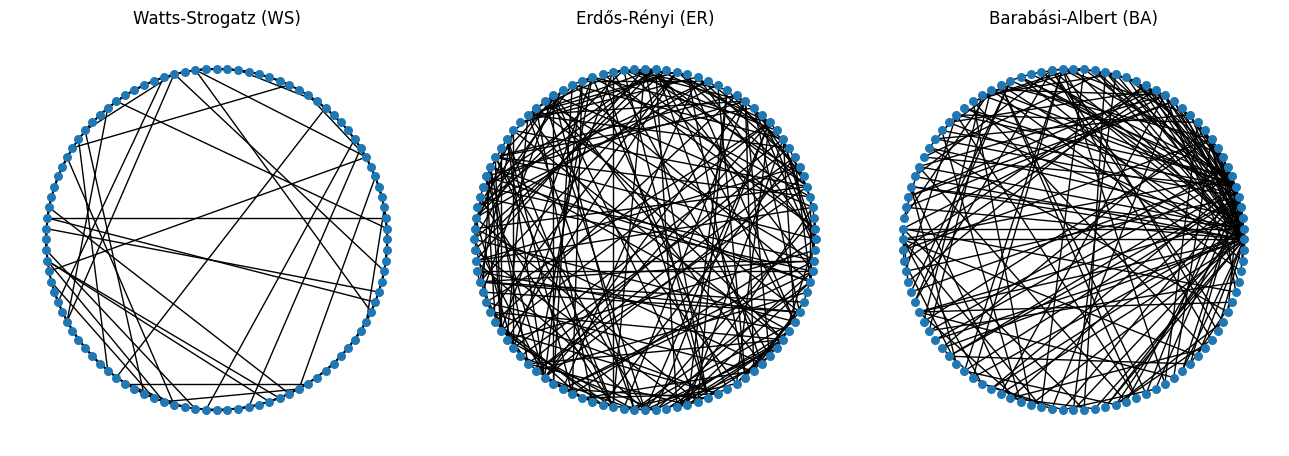

In [9]:
import matplotlib.pyplot as plt

n = 100
fig, axes = plt.subplots(1, 3, figsize=(13, 5))


G_ws = nx.watts_strogatz_graph(n=n, k=7, p=0.1, seed=42)
#n: numero de nodos, k: promedio de vecinos conectados, p:probabilidad de una conexion al azar

G_er = nx.erdos_renyi_graph(n=n, p=0.05, seed=42)
#n: numero de nodos, p:probabilidad de una conexion al azar

G_ba = nx.barabasi_albert_graph(n=n, m=2, seed=42)
#n: numero de nodos, m: hiperparametro de las BA (cuanto más grande más conexiones)


Gs, titles = (G_ws, G_er, G_ba), ("Watts-Strogatz (WS)", "Erdős-Rényi (ER)", "Barabási-Albert (BA)")
for G, ax, title in zip(Gs, axes, titles):
    
    pos= nx.circular_layout(G)
    #pos = nx.spring_layout(G, seed=42) #Para cambiar el posicionamiento de los puntos
    nx.draw(G, pos, node_size=30, with_labels=False, ax=ax)
    ax.set(title=title, aspect='equal')
    
    

fig.tight_layout()
#fig.savefig('networks.svg', dpi=500)

La forma más sencilla de ver las diferencias entre estas 3 redes es mediante lo que se denomina su **Diagrama de conectividad** $P(k)$, que es un histograma de cuantas conexiones tiene cada nodo (también denominado **grado del nodo**). Hay muchas formas de hacerlo, pero la que suelo emplear en los grafos dirigidos no ponderados es sumando las filas o columnas de la matriz de adyacencia y haciendo el histograma. Os dejo un código sencillo que hace esto a continuación:

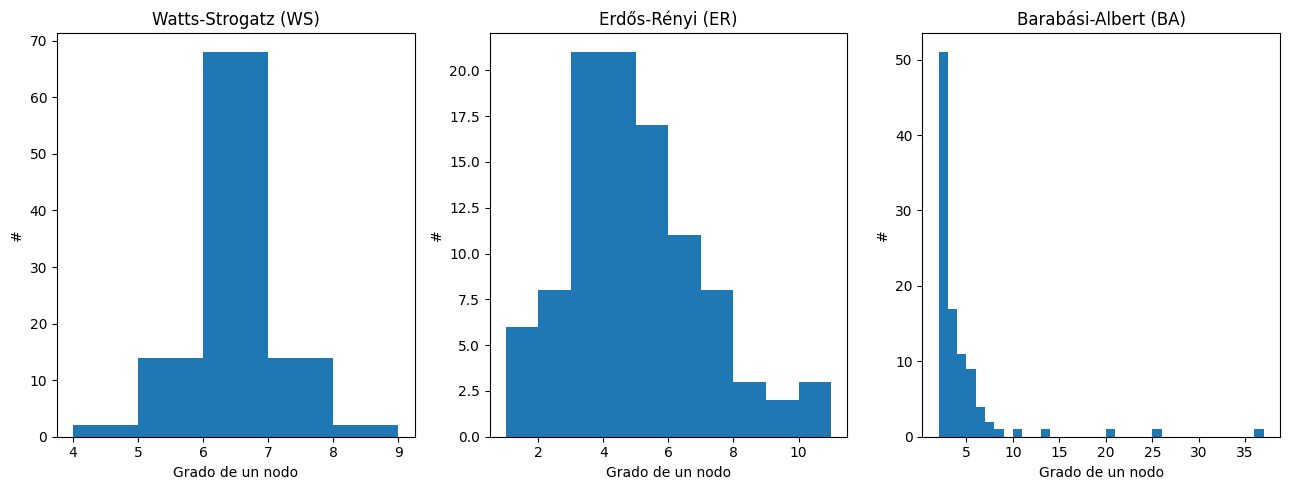

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

for G, ax, title in zip(Gs, axes, titles):
    
    A = nx.adjacency_matrix(G).toarray()
    conectivity = [sum(c) for c in A]
    
    ax.hist(conectivity, bins = range(min(conectivity), max(conectivity)+2, 1))
    ax.set(title=title, xlabel='Grado de un nodo', ylabel='#')
    
fig.tight_layout()

## Métricas de una red
Ahora vamos a hablar un poco de las propiedades más importantes de un grafo que se pueden calcular con `networkx`. Como en otras ocasiones, hay muchas métricas interesantes, pero nos centraremos en aquellas más sencillas de obtener y que están implementadas directamente en `networkx`. Estas son:
* Grado: Cuantas conexiones tienen un nodos de la red (lo que vimos justo antes el el diagrama de conectividad)
* Clustering: Coeficiente que determina lo conectados que están los nodos entre ellos. Tambien se le denomina **coeficiente de agregacion**
* Camino más corto promedio: Cantidad mínima de nodos que debe recorrer para llegar de un nodo $i$ a un nodo $j$ en promedio
* Diámetro: Camino más corto entre dos nodos $i,j$ más largo
  
Aunque las definiciones específicas merecerían más espacio, nos limitaremos a ver como obtenerlas en estos casos sencillos con `networkx`

In [50]:
# Grados
G_ws = nx.watts_strogatz_graph(n=1000, k=4, p=0.1, seed=42)
G_er = nx.erdos_renyi_graph(n=1000, p=0.01, seed=42)
G_ba = nx.barabasi_albert_graph(n=1000, m=2, seed=42)


for G, title in zip((G_ws, G_er, G_ba), titles):
    print('='*5+title+'='*5)
    grados = dict(G.degree())
    #print("Grado de cada nodo:", grados) #Solo para ver el grado de cada nodo
    grado_promedio = sum(grados.values()) / G.number_of_nodes()
    print(f"Grado promedio: {grado_promedio:.2f}")
    
    # Clustering
    clustering_nodos = nx.clustering(G)
    #print("Clustering de cada nodo:", clustering_nodos) #Solo para ver el coeficiente de clusering de cada nodo
    clustering_promedio = nx.average_clustering(G)
    print(f"Clustering promedio de la red: {clustering_promedio:.2f}")
    
    # Caminos más cortos
    camino_1_6 = nx.shortest_path(G, source=1, target=6)
    longitud_1_6 = nx.shortest_path_length(G, 1, 6)
    camino_promedio = nx.average_shortest_path_length(G)
    print("Camino más corto entre 1 y 6:", camino_1_6)
    print("Longitud de ese camino:", longitud_1_6)
    print("Camino promedio:", camino_promedio)
    
    # Diámetro
    diametro = nx.diameter(G)
    print("Diámetro del grafo G:", diametro)
    print("\n")

=====Watts-Strogatz (WS)=====
Grado promedio: 4.00
Clustering promedio de la red: 0.39
Camino más corto entre 1 y 6: [1, 3, 4, 6]
Longitud de ese camino: 3
Camino promedio: 9.226538538538538
Diámetro del grafo G: 18


=====Erdős-Rényi (ER)=====
Grado promedio: 9.97
Clustering promedio de la red: 0.01
Camino más corto entre 1 y 6: [1, 136, 763, 6]
Longitud de ese camino: 3
Camino promedio: 3.260036036036036
Diámetro del grafo G: 6


=====Barabási-Albert (BA)=====
Grado promedio: 3.99
Clustering promedio de la red: 0.03
Camino más corto entre 1 y 6: [1, 6]
Longitud de ese camino: 1
Camino promedio: 4.0488888888888885
Diámetro del grafo G: 7




## Uso en sistemas dinámicos: Sistema de ecuaciones diferenciales acoplados
Vamos a acabar este clase con un último uso de las redes: Conectar distintos sistemas de ecuaciones diferenciales

Por poner un ejemplo práctico, consideremos que tenemos $N$ ecosistemas distintos, en los que existe una cierta cantidad de zorros $z$ y conejos $c$. Entonces, para cada ecosistema $i$, tendremos una siguienta cantidad de zorros $z_i$ y conejos  $c_i$, que vendrá dada por un modelo depredador-presa (Lotka-Volterra):  

$$\frac{dz_i}{dt}=z_i\left(c_i-1\right)$$
$$\frac{dc_i}{dt}=c_i\left(1-z_i\right)$$

Entonces, si nosotros queremos añadir una dinámica entre distintos ecosistemas conectados, podemos añadir a esa ecuación diferencial un término que sea una contribución de otros ecosistemas. El más sencillo de pensar es lo que se denomina un término difusivo, en el que limitándonos a nuestro ejemplo, sería equivalente a que tanto conejos como zorros tenderán a ir a los ecosistemas menos poblados y abandonar aquellos que tengan más población. Las ecuaciones diferenciales del sistema con el término de red tendrían la siguiente forma:

$$\frac{dz_i}{dt}=z_i\left(c_i-1\right) + D \sum_{j=1}^{N}{a_{ij}(z_j-z_i)}$$
$$\frac{dc_i}{dt}=c_i\left(1-z_i\right) + D \sum_{j=1}^{N}{a_{ij}(c_j-c_i)}$$

En la ecuación de arriba $a_{ij}$ es el término correspondiente de la matriz $A$ y $D$ es un parámetro que nos informa de cuán relevante es la red en el sistema.

A nivel de programación hay una forma equivalente de programar este tipo de sistemas que es mucho más eficiente que recorrer término a término la matriz de adyacencia: Hacer el producto matricial con la **matriz Laplaciana** $\mathcal{L}$. La matriz Laplaciana es exactamente igual que la matriz de adyacencia, pero con el grado de cada nodo en la diagonal cambiado de signo. Con el ejemplo del grafo del principio:  
  
$$A=\begin{pmatrix} 0&1&0&0&1&0 \\ 1&0&1&0&1&0 \\ 0&1&0&1&0&0 \\ 0&0&1&0&1&1 \\ 1&1&0&1&0&0 \\ 0&0&0&1&0&0 \end{pmatrix} \Longrightarrow ~~\mathcal{L}=\begin{pmatrix} -2&1&0&0&1&0 \\ 1&-3&1&0&1&0 \\ 0&1&-2&1&0&0 \\ 0&0&1&-3&1&1 \\ 1&1&0&1&-3&0 \\ 0&0&0&1&0&-1 \end{pmatrix}$$ 


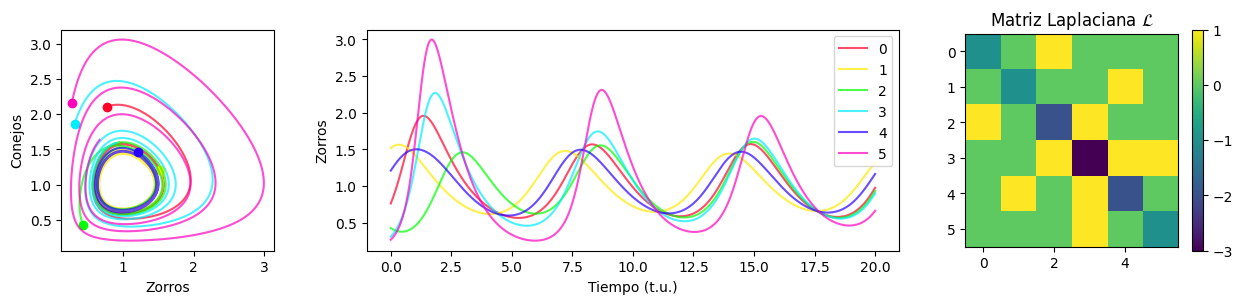

In [58]:
import numpy as np

# Funciones para integrar el sistema Lotka-Volterra
LV = lambda x: np.array([x[0]*(x[1] - 1), x[1]*(1 - x[0])])
def RK4(x, dt=0.01, f=LV):
    k1 = f(x)
    k2 = f(x + dt*0.5*k1)
    k3 = f(x + dt*0.5*k2)
    k4 = f(x + dt*k3)
    return x + dt*(k1+2*k2+2*k3+k4)/6

N = 6 # Cantidad de ecosistemas

#Matriz Laplaciana ¡¡Ojo, en networkx la matriz laplaciana viene por defecto cambiada de signo!!
L = -nx.laplacian_matrix(nx.erdos_renyi_graph(n=N, p=0.2, seed=42)).toarray()

#Condiciones iniciales
np.random.seed(42)
X = (np.random.random((N, 2))+0.5)**2

dt=0.01 # deltat de la simulacion numérica
D = 1e-1 # Parámetro de red
T=2000 # Pasos a realizar en la simulacion

t = np.linspace(0, dt*T, T)
Solution =[X[:]]
for _ in range(T):
    X = []
    for x in Solution[-1]:
        X.append(RK4(x,dt=dt))
    X += dt*D*L@X ## Ver nota técnica de abajo ##
    Solution.append(X)             

"""
Nota técnica: En este código añadimos el término de red como una correción a la solución que ofrece el Runge-Kuta 4
La manera más estable y correcta numéricamente es integrar el término de red en el propio cálculo del método Runge Kutta
Pero para un ejemplo rápido, es suficientemente preciso. Para simulaciones de difusión más rigurosas, se debe tener esto en cuenta
"""

Solution = np.array(Solution[:-1])

c = plt.cm.gist_rainbow(np.linspace(0, 1, len(L))) # Esquema de colores para diferenciar bien en las graficas

#Representación de los resultados
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 3), width_ratios=(1, 2, 1))
for i in range(len(L)):
    ax1.plot(Solution[:, i, 0][0], Solution[:, i, 1][0], 'o', color=c[i])
    ax1.plot(Solution[:, i, 0], Solution[:, i, 1], color=c[i], alpha=0.7)
    ax2.plot(t, Solution[:, i, 0], color=c[i], alpha=0.7, label=f'{i}') #Si se quiere representar a los conejos, cambiar el 0 por un 1
matrix = ax3.imshow(L)
plt.colorbar(matrix, ax = ax3)

ax1.set(xlabel='Zorros', ylabel='Conejos', aspect='equal')
ax2.set(xlabel='Tiempo (t.u.)', ylabel='Zorros')
ax2.legend(fontsize=10)
ax3.set(title=r'Matriz Laplaciana $\mathcal{L}$', aspect='equal')
fig.tight_layout()
